<a href="https://colab.research.google.com/github/echiyembekeza/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Eric%20Chiyembekeza%20-%20DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
inner_join = cell_phones.merge(population, on=['geo', 'time'], how = 'inner')
inner_join


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299
5,afg,1977,0.0,13067538
6,afg,1978,0.0,13237734
7,afg,1979,0.0,13306695
8,afg,1980,0.0,13248370
9,afg,1981,0.0,13053954


In [0]:
#check the shape, to make sure that we have the proper df
inner_join.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
geo_cou_sub = geo_country_codes[['geo', 'country']]
df = inner_join.merge(geo_cou_sub)

df.shape


(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
#we need to calculate the number of cell phones per person in the US in 2017
#I would create a subset of individuals with cell phones in 2017


In [0]:
usa = df[df['country'] == "United States"] 
info = usa.loc[usa.index[-1]]

cell_ratio = info.cell_phones_total / info.population_total
cell_ratio


1.2201246847283354

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
usa['geo'] = usa['geo'].str.upper()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
usa


,geo,time,cell_phones_total,population_total,country
8092,USA,1960,0.0,186808228,United States
8093,USA,1965,0.0,199815540,United States
8094,USA,1970,0.0,209588150,United States
8095,USA,1975,0.0,219205296,United States
8096,USA,1976,0.0,221239215,United States
8097,USA,1977,0.0,223324042,United States
8098,USA,1978,0.0,225449657,United States
8099,USA,1979,0.0,227599878,United States
8100,USA,1980,0.0,229763052,United States
8101,USA,1984,91600.0,238573861,United States


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
usa.describe()



,time,cell_phones_total,population_total
count,43.000000,4.300000e+01,4.300000e+01
mean,1994.813953,1.170089e+08,2.681403e+08
std,14.560638,1.366524e+08,3.678906e+07
min,1960.000000,0.000000e+00,1.868082e+08
25%,1985.500000,5.110190e+05,2.419615e+08
50%,1996.000000,4.404299e+07,2.688034e+08
75%,2006.500000,2.394500e+08,2.992113e+08
max,2017.000000,3.958810e+08,3.244595e+08


In [0]:
countries = df['country'].nunique()
countries

195

In [0]:
df.head

<bound method NDFrame.head of       geo  time  cell_phones_total  population_total      country
0     afg  1960                0.0           8996351  Afghanistan
1     afg  1965                0.0           9938414  Afghanistan
2     afg  1970                0.0          11126123  Afghanistan
3     afg  1975                0.0          12590286  Afghanistan
4     afg  1976                0.0          12840299  Afghanistan
5     afg  1977                0.0          13067538  Afghanistan
6     afg  1978                0.0          13237734  Afghanistan
7     afg  1979                0.0          13306695  Afghanistan
8     afg  1980                0.0          13248370  Afghanistan
9     afg  1981                0.0          13053954  Afghanistan
10    afg  1982                0.0          12749645  Afghanistan
11    afg  1983                0.0          12389269  Afghanistan
12    afg  1984                0.0          12047115  Afghanistan
13    afg  1985                0.0          11

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
time_group = df[df['time'] == 2017]
time_group.head()

,geo,time,cell_phones_total,population_total,country
45,afg,2017,"23,929,713.0",35530081,Afghanistan
91,ago,2017,"13,323,952.0",29784193,Angola
137,alb,2017,"3,497,950.0",2930187,Albania
183,and,2017,"80,337.0",76965,Andorra
219,are,2017,"19,826,224.0",9400145,United Arab Emirates


In [0]:
top = time_group.sort_values(['cell_phones_total', 'country'], axis=0, ascending=False)


In [0]:
top.head(5)


,geo,time,cell_phones_total,population_total,country
1496,chn,2017,"1,474,097,000.0",1409517397,China
3595,ind,2017,"1,168,902,277.0",1339180127,India
3549,idn,2017,"458,923,202.0",263991379,Indonesia
8134,usa,2017,"395,881,000.0",324459463,United States
1084,bra,2017,"236,488,548.0",209288278,Brazil


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
usa.loc[(usa['cell_phones_total'] > usa['population_total'])]
# the first year was 2014

,geo,time,cell_phones_total,population_total,country
8131,USA,2014,"355,500,000.0",317718779,United States
8132,USA,2015,"382,307,000.0",319929162,United States
8133,USA,2016,"395,881,000.0",322179605,United States
8134,USA,2017,"395,881,000.0",324459463,United States


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [4]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [19]:
dfa = df.groupby(['Year', 'Occupation']).count()
dfa

def normalize(dfa):
    result = dfa.copy()
    for guest in df.columns:
        max_value = df[guest].max()
        min_value = df[guest].min()
        result[guest] = (df[guest] - min_value) / (max_value - min_value)
    return result
  
dfa

GoogleKnowlege_Occupation  Show  Group  Guest
Year Occupation                                                            
1999 Acting, Comedy & Music                         150   150    150    150
     Government and Politics                          2     2      2      2
     Media                                           11    11     11     11
     Other                                            0     3      0      3
2000 Acting, Comedy & Music                         125   125    125    125
     Government and Politics                         14    14     14     14
     Media                                           21    21     21     21
     Other                                            5     9      5      9
2001 Acting, Comedy & Music                         114   114    114    114
     Government and Politics                          6     6      6      6
     Media                                           31    31     31     31
     Other                                            5     6      5      6
2002 Acting, Comedy & Music                          99    99     99     99
     Government and Politics                         11    11     11     11
     Media                                           42    42     42     42
     Other                                            5     7      5      7
2003 Acting, Comedy & Music                          93    93     93     93
     Government and Politics                         17    17     17     17
     Media                                           41    41     41     41
     Other                                            9    15      8     15
2004 Acting, Comedy & Music                          63    63     63     63
     Government and Politics                         37    37     37     37
     Media                                           45    45     45     45
     Other                                           17    19     16     19
2005 Acting, Comedy & Music                          60    60     60     60
     Government and Politics                         26    26     26     26
     Media                                           54    54     54     54
     Other                                           22    22     22     22
2006 Acting, Comedy & Music                          58    58     58     58
     Government and Politics                         31    31     31     31
...                                                 ...   ...    ...    ...
2008 Media                                           77    77     77     77
     Other                                           19    20     17     20
2009 Acting, Comedy & Music                          34    34     34     34
     Government and Politics                         34    34     34     34
     Media                                           59    59     59     59
     Other                                           36    36     36     36
2010 Acting, Comedy & Music                          58    58     58     58
     Government and Politics                         30    30     30     30
     Media                                           50    50     50     50
     Other                                           26    27     26     27
2011 Acting, Comedy & Music                          55    55     55     55
     Government and Politics                         27    27     27     27
     Media                                           51    51     51     51
     Other                                           30    30     30     30
2012 Acting, Comedy & Music                          44    44     44     44
     Government and Politics                         33    33     33     33
     Media                                           52    52     52     52
     Other                                           31    35     31     35
2013 Acting, Comedy & Music                          71    71     71     71
     Government and Politics                         21    21     21     21
  

In [0]:
#The numbers are right...I need to normalize the data

### Part 2 — Recreate this explanatory visualization:

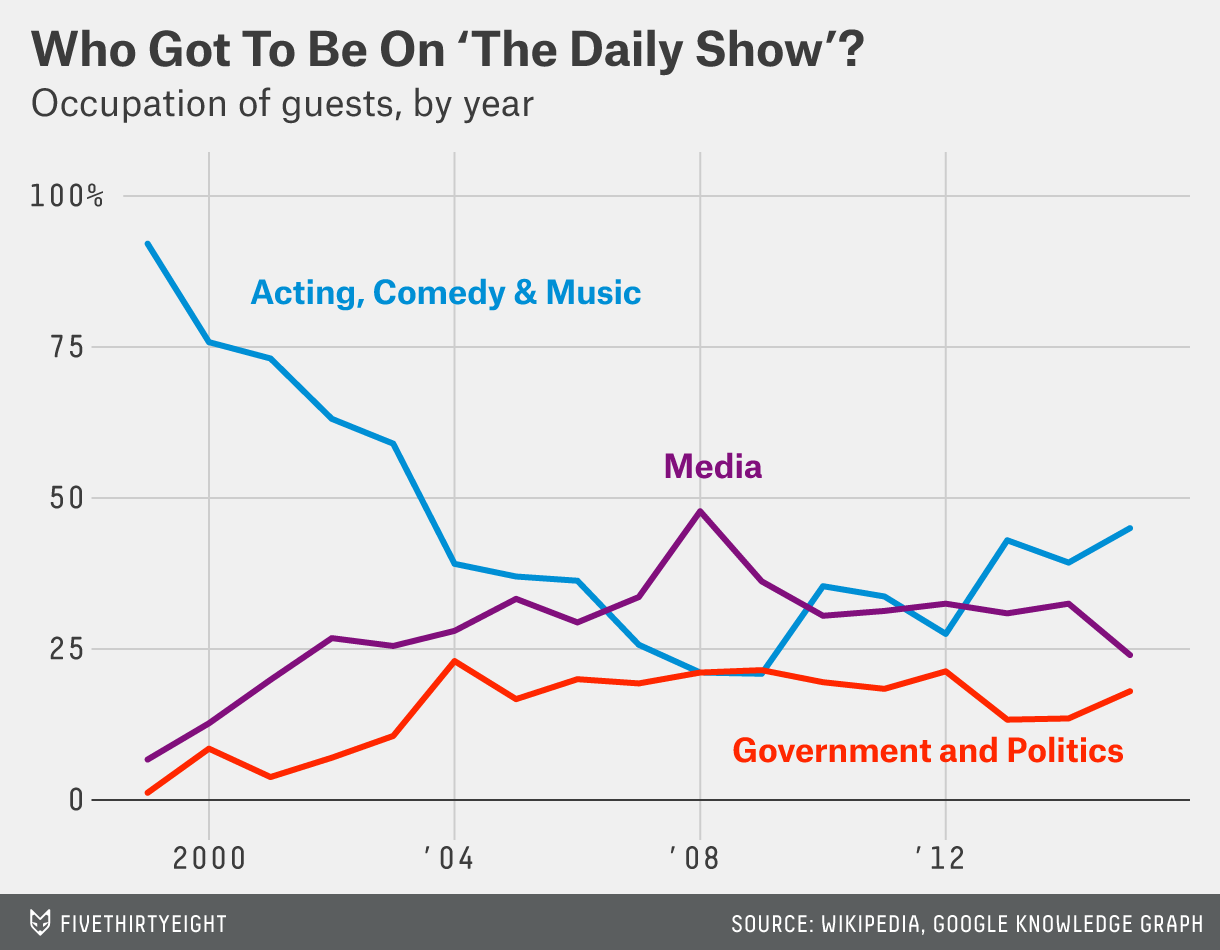

In [25]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

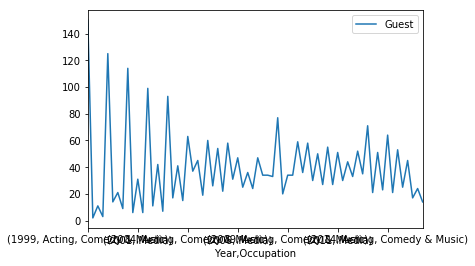

In [62]:
import matplotlib.pyplot as plt
dfa_2 = dfa.drop(['GoogleKnowlege_Occupation', 'Show', 'Group'], axis=1)
dfa_2.plot()
plt.show()
#I was still configuring this one. This graph will be off because I did not normalize my data in the df above.


**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)